## Parameter recovery summary

We were able to simulate data, estimate parameters using BHM and MLE. No we want to make some summary plots to evaluate each method.

In [40]:
# Built-in/Generic Imports
import os,sys
import glob
import math

# Libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

### BHM heatmaps

In [50]:
bhm_fn = os.path.join('simul/parameter_estimate_bhm.csv')
bhm_df = pd.read_csv(bhm_fn,index_col=0)

for v in ['kappa','gamma']:
    for type in ['sing','agg']:
        bhm_df['{}_{}_mse'.format(v,type)] = (bhm_df['{}_bhm_{}'.format(v,type)]-bhm_df['{}_gt'.format(v)])**2
        bhm_df['{}_{}_nmse'.format(v,type)] = 100*(bhm_df['{}_bhm_{}'.format(v,type)]-bhm_df['{}_gt'.format(v)])**2 / (bhm_df['{}_bhm_{}'.format(v,type)])**2
bhm_df.head()


,kappa_gt,gamma_gt,kappa_bhm_sing,gamma_bhm_sing,kappa_bhm_agg,gamma_bhm_agg,kappa_sing_mse,kappa_sing_nmse,kappa_agg_mse,kappa_agg_nmse,gamma_sing_mse,gamma_sing_nmse,gamma_agg_mse,gamma_agg_nmse
0,0.00001,0.5,0.001399,0.437808,0.001136,0.428097,1.928345e-06,98.575160,1.268778e-06,98.247800,0.003868,2.017918,0.005170,2.821002
1,0.00001,1.0,0.000078,1.024450,0.000061,1.028331,4.573344e-09,75.895113,2.608124e-09,69.931899,0.000598,0.056960,0.000803,0.075904
2,0.00001,1.5,0.000242,5.884628,0.000232,5.851508,5.404858e-08,91.922089,4.922519e-08,91.560387,19.224967,55.517193,18.935619,55.302396
3,0.00001,2.0,0.000190,2.135742,0.000161,2.157214,3.230395e-08,89.736660,2.285660e-08,87.976728,0.018426,0.403954,0.024716,0.531124
4,0.00001,2.5,0.000043,10.133943,0.000053,7.188675,1.106667e-09,59.116851,1.880931e-09,66.036388,58.277090,56.746740,21.983669,42.540494


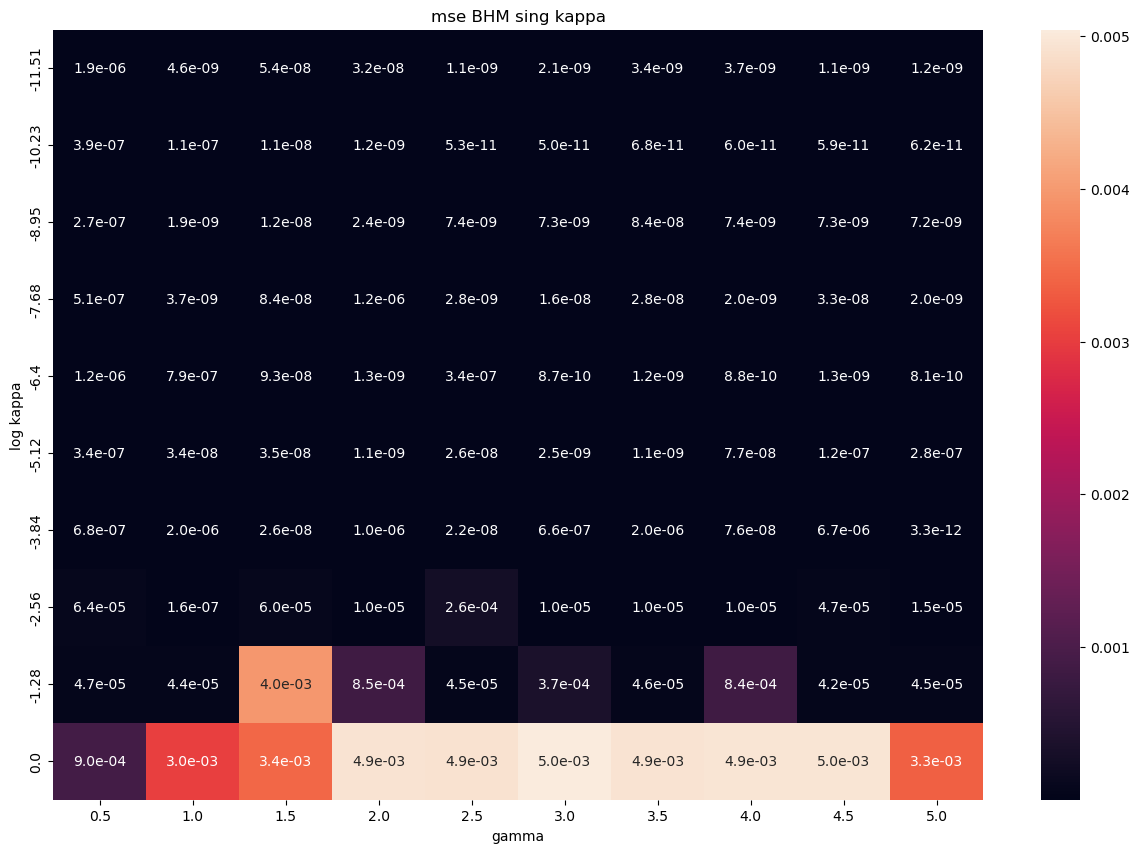

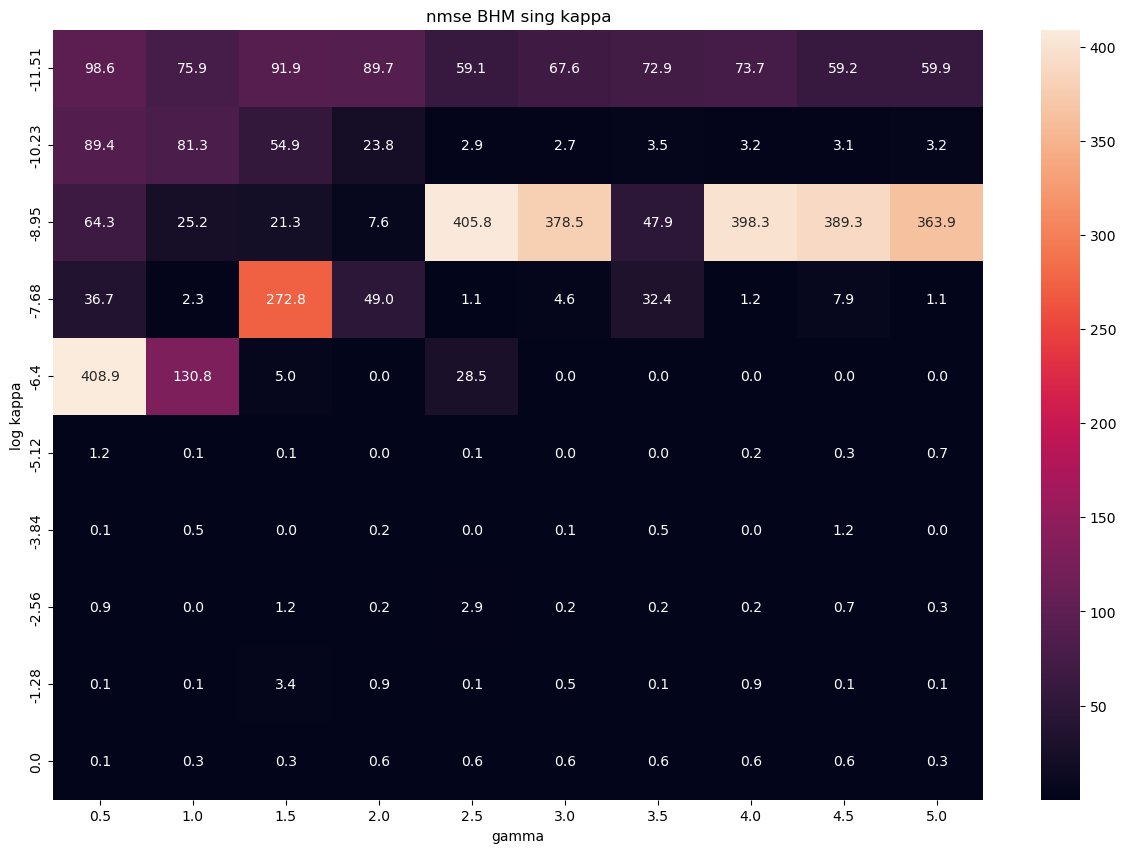

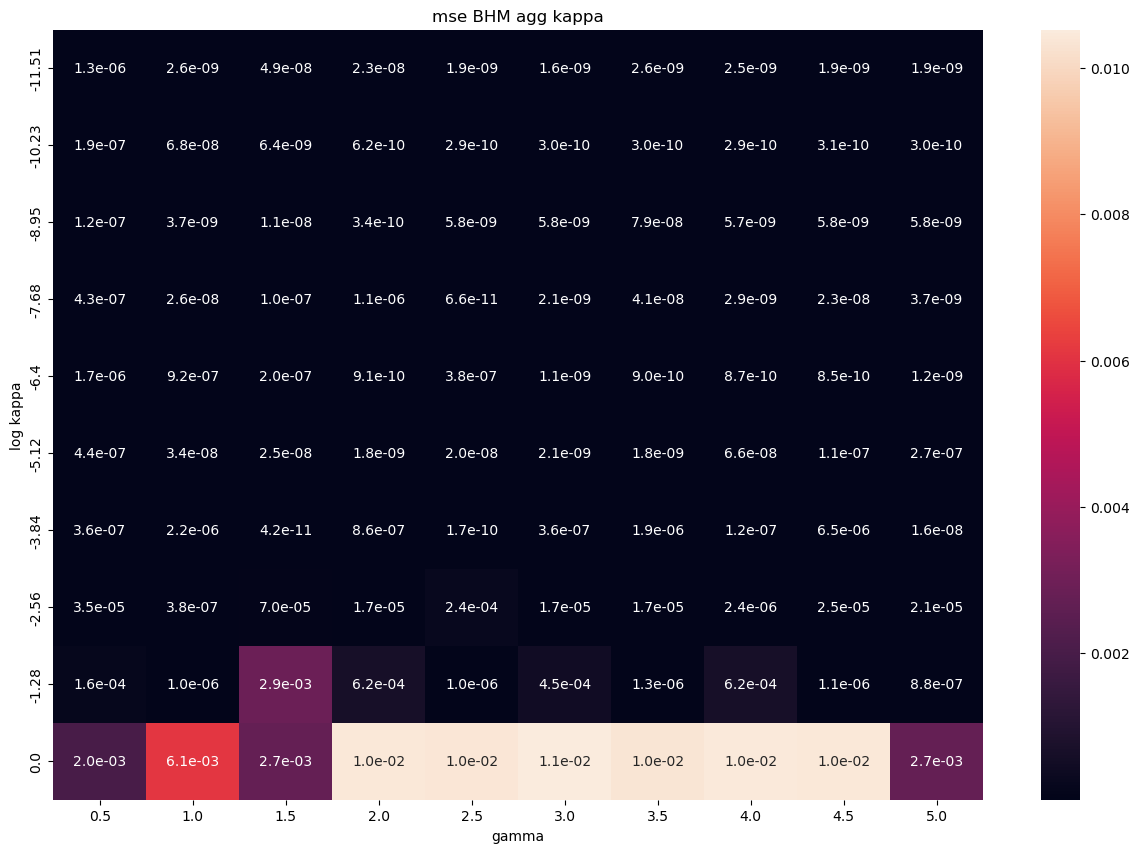

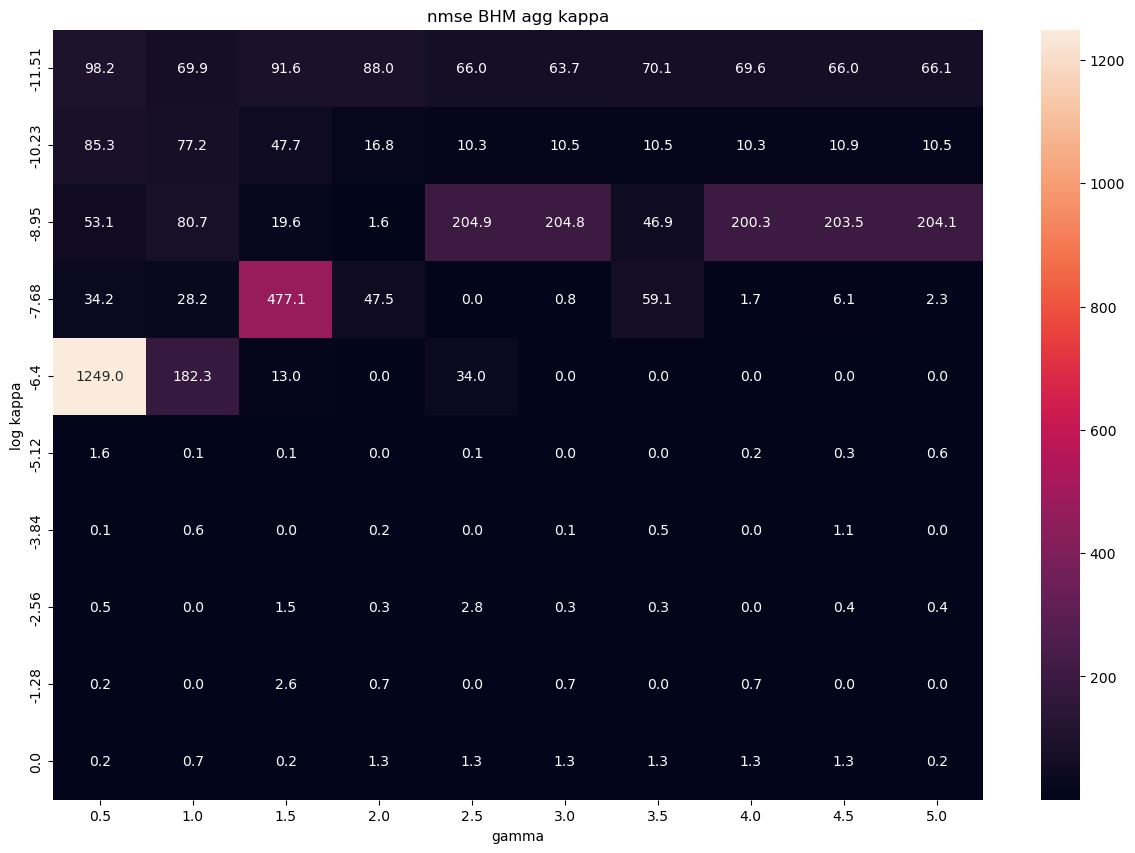

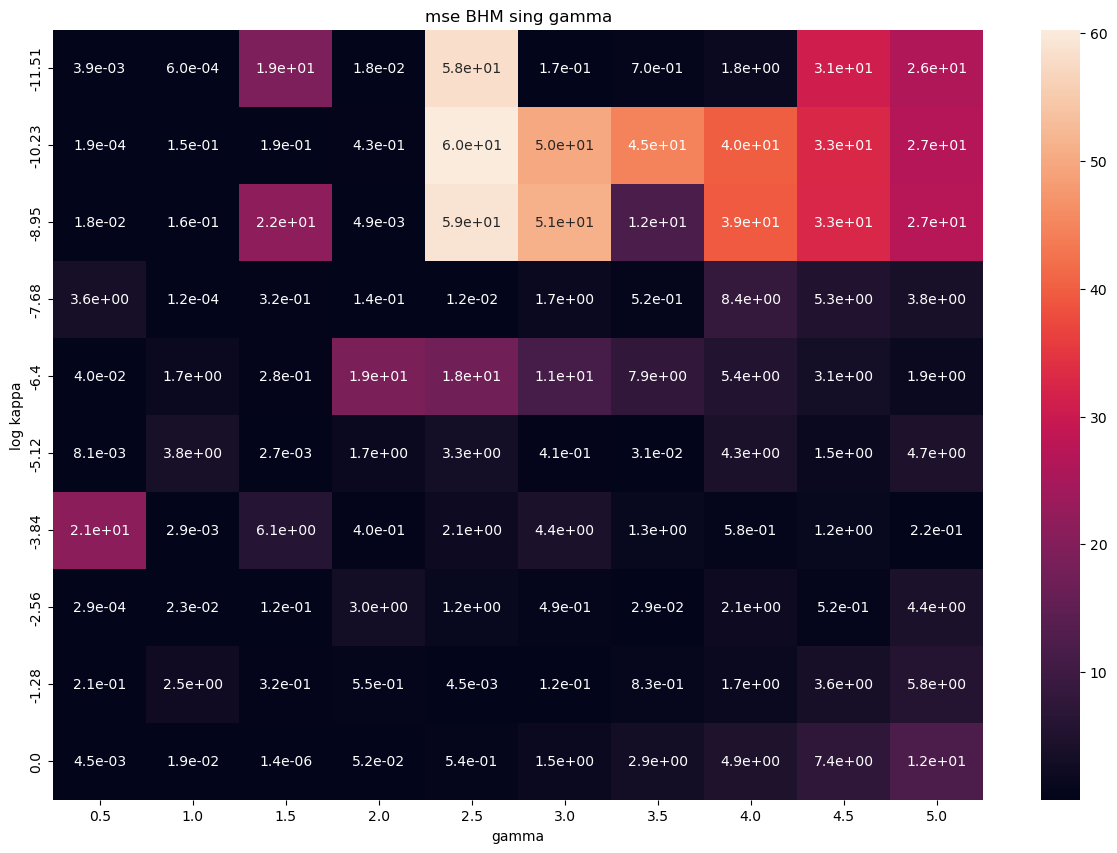

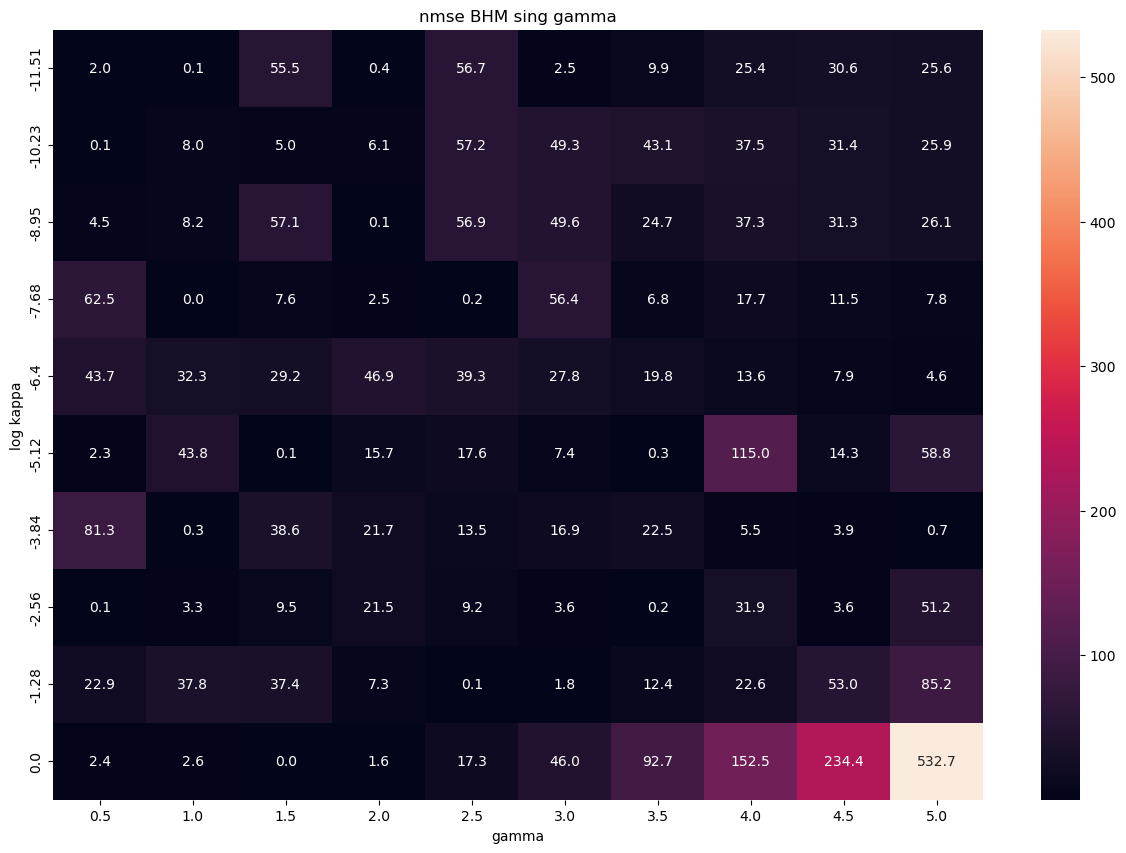

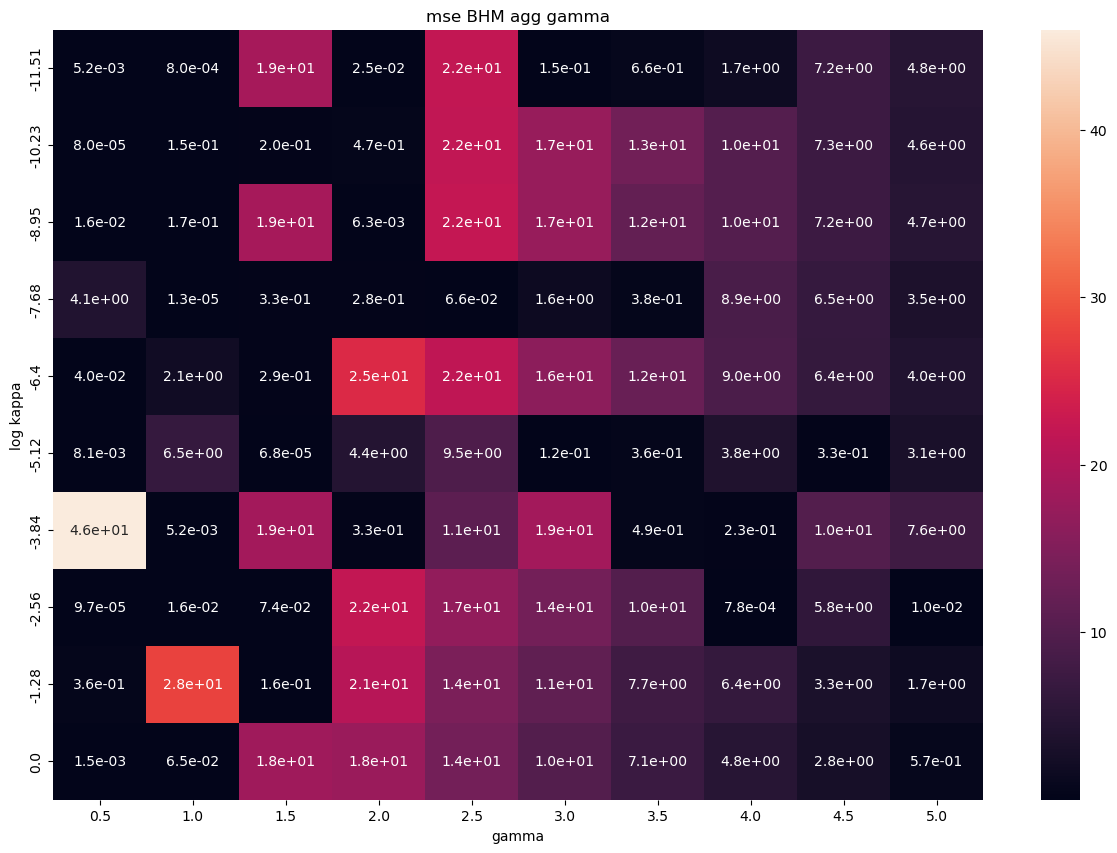

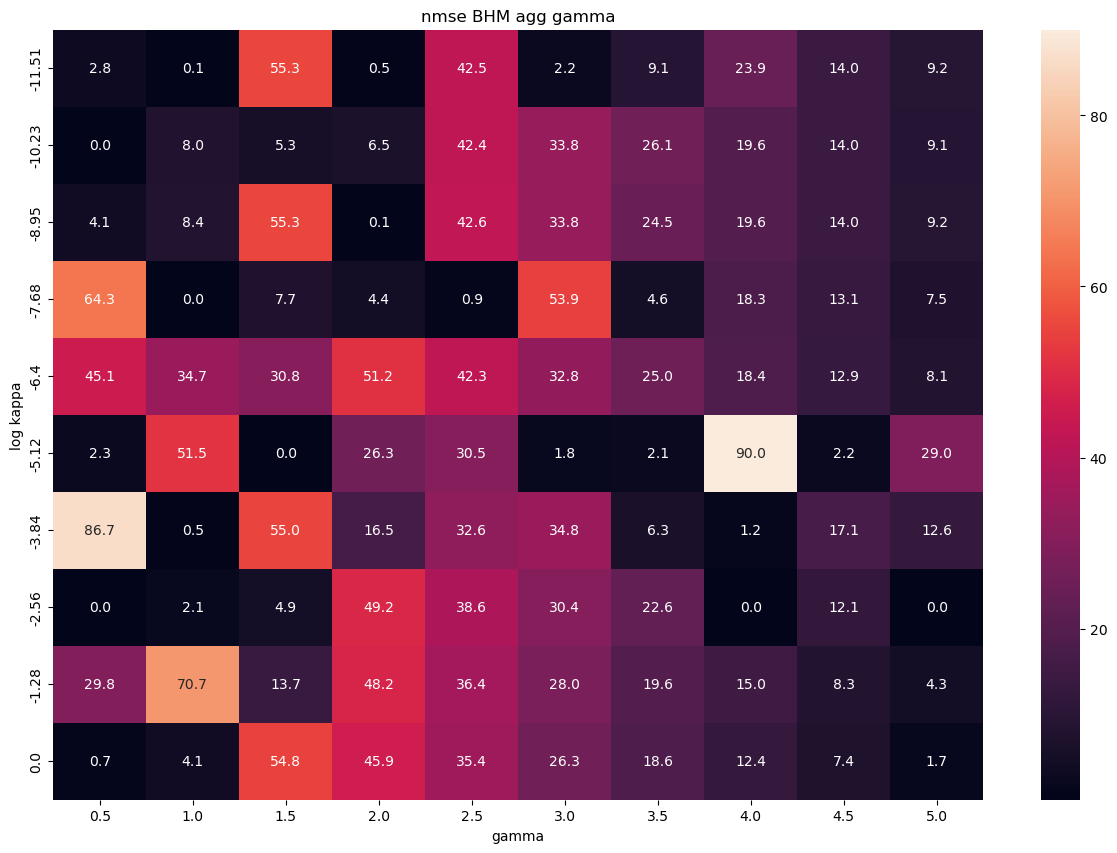

In [52]:
for v in ['kappa','gamma']:
    for type in ['sing','agg']:
        for err in ['mse','nmse']:
            mse = bhm_df['{}_{}_{}'.format(v,type,err)].values.reshape(10,10)
            index = np.round(np.log(bhm_df['kappa_gt'].unique()),2)
            columns = bhm_df['gamma_gt'].unique()
            mse_df = pd.DataFrame(mse,index=index,columns=columns)

            fig,ax = plt.subplots(figsize=(15,10))
            fmt = '.1e'
            if err == 'nmse':
                fmt = '.1f'
            s=sns.heatmap(mse_df,annot=True,fmt=fmt,ax=ax)
            s.set(xlabel='gamma', ylabel='log kappa')
            ax.set_title('{} BHM {} {}'.format(err,type,v))
            fig.savefig('simul/img/{}_bhm_{}_{}'.format(v,type,err))
